<a href="https://colab.research.google.com/github/blank0043/Machine-Learning/blob/main/project6_building_manual_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will make a model by hand to classify iris flower data.

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
# Read the iris data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data = 'https://raw.githubusercontent.com/blank0043/Machine-Learning/main/data/iris.data'
iris = pd.read_csv(data)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id="terminology"></a>
### Terminology

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)
- **Classification problem** because response is categorical.

## "Human Learning" With Iris Data

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

#### Gather some basic information about the data.

In [4]:
# 150 observations, 5 columns (the 4 features & response)
iris.shape

(150, 5)

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
# Verify the basic stats look appropriate
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Test for imbalanced classes
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Sort the DataFrame by petal_width.
iris.sort_values(by='petal_width', ascending=True, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [11]:
# Sort the DataFrame by petal_width and display the NumPy array.
iris.sort_values(by='petal_width', ascending=True).values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

#### Split-apply-combine: Explore the data while using a `groupby` on `'species'`.

In [12]:
# Mean of sepal_length, grouped by species.
iris.groupby(by='species', axis=0).sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [13]:
# Mean of all numeric columns, grouped by species.
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [14]:
# describe() of all numeric columns, grouped by species.
iris.groupby('species').describe()

sepal_length                        ... petal_width               
                       count   mean       std  min  ...         25%  50%  75%  max
species                                             ...                           
Iris-setosa             50.0  5.006  0.352490  4.3  ...         0.2  0.2  0.3  0.6
Iris-versicolor         50.0  5.936  0.516171  4.9  ...         1.2  1.3  1.5  1.8
Iris-virginica          50.0  6.588  0.635880  4.9  ...         1.8  2.0  2.3  2.5

[3 rows x 32 columns]

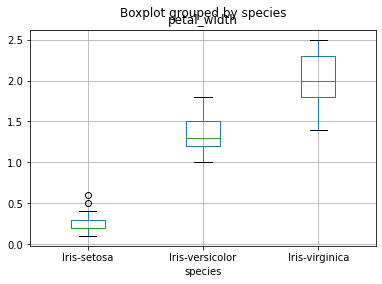

In [15]:
# Box plot of petal_width, grouped by species.
iris.boxplot(column='petal_width', by='species');

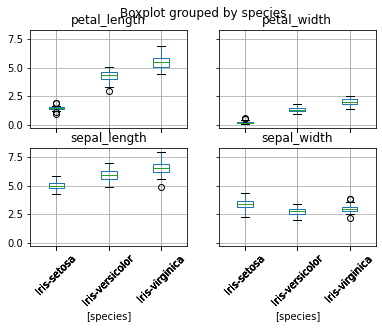

In [16]:
# Box plot of all numeric columns, grouped by species.
iris.boxplot(by='species', rot=45);

In [17]:
# Map species to a numeric value so that plots can be colored by species.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Alternative method:
iris['species_num'] = iris.species.factorize()[0]

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0


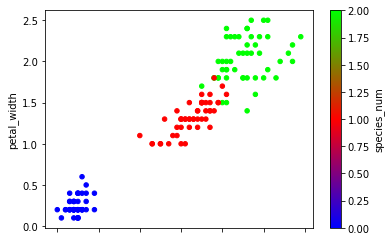

In [19]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

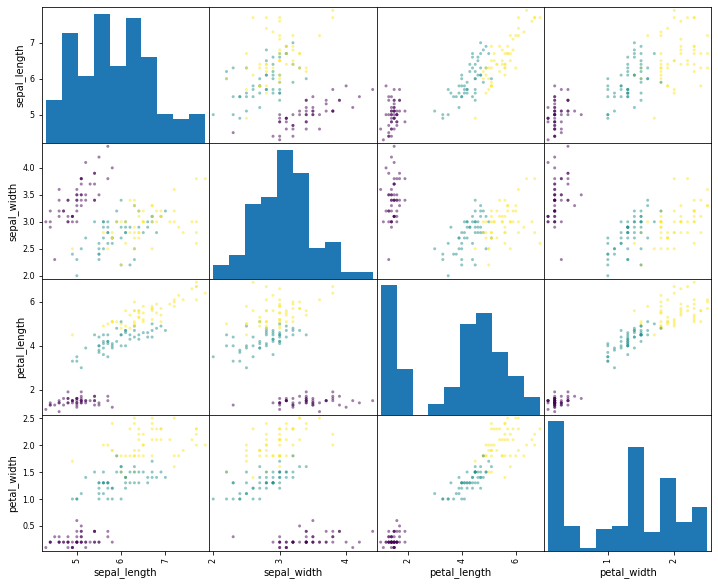

In [20]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

In [21]:
iris['petal_area'] = ((iris.petal_length/2) + (iris.petal_width/2) * 3.124)



Write a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

In [22]:
def predict_flower(df):
    preds = []
    
    # for each row of df, make a prediction
    for index, row in df.iterrows():
        if row.petal_area < 2:
            prediction = 'Iris-setosa'
        elif row.petal_area < 6:
            prediction = 'Iris-versicolor'
        else:
            prediction = 'Iris-virginica'
        preds.append(prediction)
    # add a column to the DataFrame with the predictions
    df['prediction'] = preds
    
    
predict_flower(iris)

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area,prediction
32,5.2,4.1,1.5,0.1,Iris-setosa,0,0.9062,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa,0,0.7062,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa,0,0.9062,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0.9062,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa,0,0.8562,Iris-setosa


In [25]:
# Let's see what percentageyour manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly

sum(iris.species == iris.prediction) / 150.

0.8333333333333334

## Human Learning on the Iris Data Set
---

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

In [26]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# Create a custom color map.
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [27]:
# Map each iris species to a number.
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

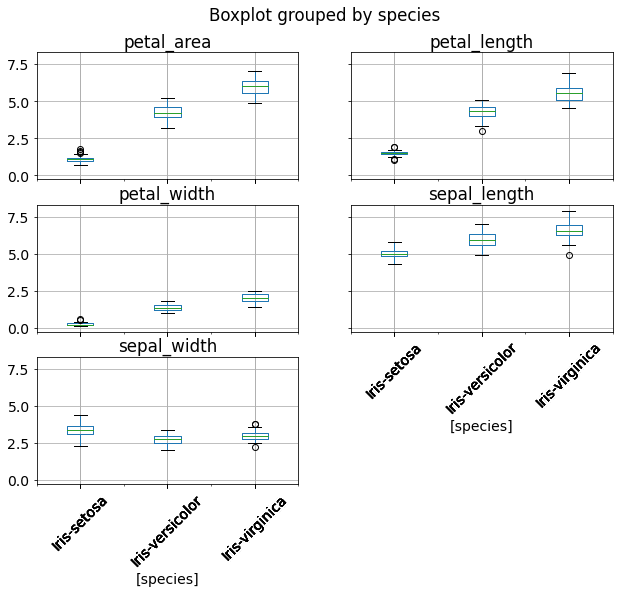

In [28]:
# Box plot of all numeric columns, grouped by species.
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

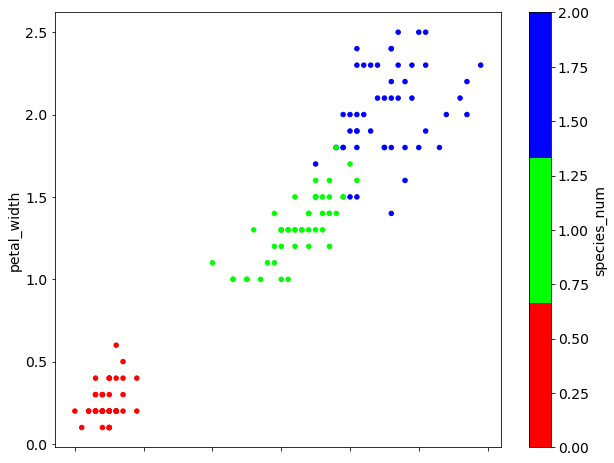

In [29]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

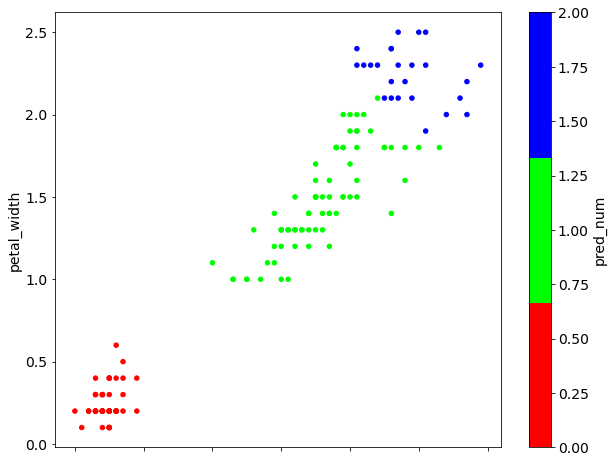

In [30]:
iris['pred_num'] = iris.prediction.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})



# Create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTION.
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='pred_num', colormap=cmap_bold);